# main.ipynb
This notebook lets you use entsoe-py repository in a simple intuitive way.

* Author: Timur Kasimov
* Date Created: July 1, 2024
* Date Updated: July 2024



In [51]:
# import necessary libraries and repo-internal scripts
import plotter
import sampler
import scraper
import psr_groups
import country_groups
import mykey
import os

if 'data' in os.listdir():
    os.chdir('data')


## PLOTTING

Plotting relies on data having been scraped and resampled to necessary **frequency and region**.

* original raw data is country-specific and saved in ./data/country_name.xlsx
* country specific data with specific frequency is saved in ./data/[FREQ]/[country_name freq].xlsx
* region specific data with specified frequency is saved in ./data/combined/[region freq].xlsx
  

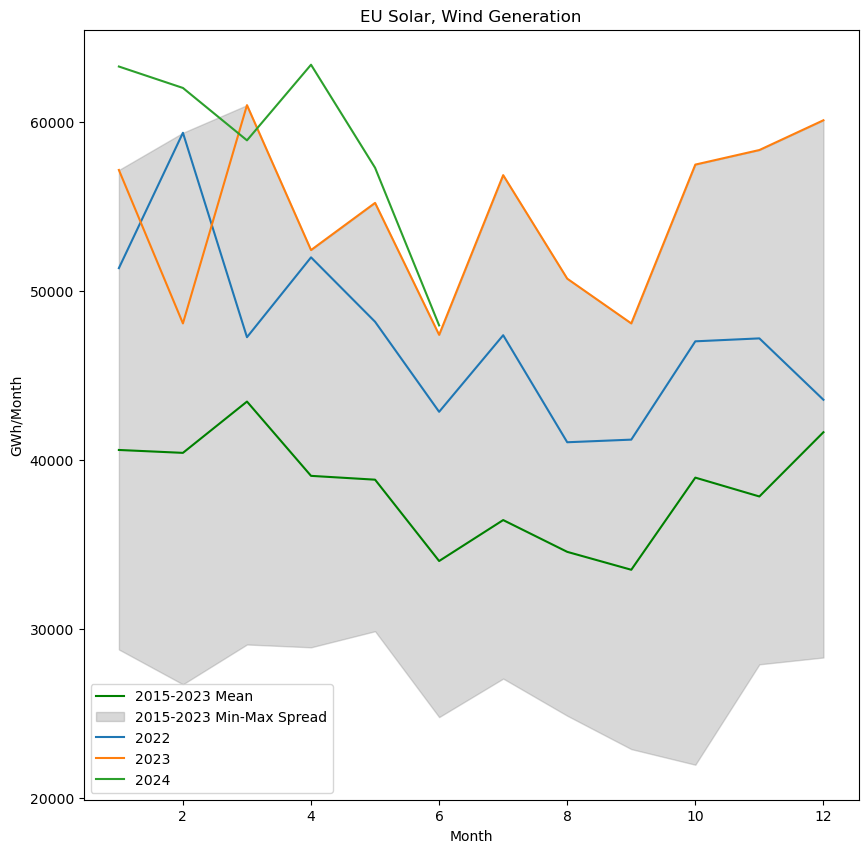

In [52]:
 ### REGION ###
region = 'EU'   # name of the combined region as saved in excel files
freq = '1M'     # frequency as saved in excel files


### YEARS FOR MIN-MAX SPREAD AND MEAN LINE ###
start_spread = 2015     
end_spread = 2023   


### GENERATION TYPE/GROUP ###
psr_codes = psr_groups.SOLAR_WIND # group for type of generation (see psr_groups.py and mappings.py)
psr_label = 'Solar, Wind' # custom label for generation type


### YEAR-SPECIFIC LINES ###
start_year = 2022
end_year =2024


### PLOTTING ###
plotter.my_plot(region, freq, psr_codes, psr_label, range=(start_spread, end_spread), years=range(start_year, end_year+1), output_table_file=True)

## REGION RESAMPLER
This code aggregates data for a specific region (EU, TOP5EU, etc)
* Relies on having the country-specific data of specified frequency

In [ ]:
country_codes = country_groups.EU
# country_codes = ['RO']
freq = '1M'
start_year = 2015
end_year = 2024


# # records combined values for the region in the ./combined folder
# aggregate_region(country_codes, freq, start_year, end_year, name='EU') 

##  FREQUENCY RESAMPLER

Changes the raw data to desired frequency data for all countries
* the variable ```freq``` uses pandas frequencies:
    * ```'1M'``` - 1 month
    * ```'1W'``` - 1 Week
    * ```'1D'``` - 1 Day

  
* set ```append``` to ```False``` if creating a new frequency format, to ```True``` if updating existing files with most recent data


In [ ]:
country_codes = country_groups.EU # all 27 EU countries
# country_codes = ['PL'] # alternative specification
freq = '1M' 
start_year = 2024 # earliest available is 2015
end_year = 2024 


# #########################################################
# ### RUN THIS ONLY WHEN UPDATING COUNTRY-SPECIFIC DATA ###
# #########################################################
# # records new frequency for each country in a respective folder
# sampler.record_new_frequency(country_codes, freq, start_year, end_year, append=False)

## SCRAPER

This code pulls data directly from ENTSO-E platform. Use this to update the generation values
for the most recent year at once 

**THIS CODE TAKES A LONG TIME TO RUN**


In [ ]:
ent_app = ent.Entsoe(KEY) # my api key/token

start = 2024 # 2015 is the earliest year available
end = 2024 # current year is the latest available

country_code_list = country_groups.EU
# country_code_list = ['RO']



# scraper.generation_scraper(start, end, country_code_list)